In [1]:
import netCDF4
import xarray
import numpy as np
import os
from ipywidgets import interact, widgets, fixed
import matplotlib.pyplot as plt

In [2]:
data_pr = netCDF4.Dataset('../data/working/pr_A3hr_CAM5-1-025degree_PlusRCP85_MRI-est1_v1-0_run002_208401010000-208408312359.nc')
data_prw = netCDF4.Dataset('../data/working/prw_A3hr_CAM5-1-025degree_PlusRCP85_MRI-est1_v1-0_run002_208401010000-208408312100.nc')
data_u850 = netCDF4.Dataset('../data/working/ua850_A3hr_CAM5-1-025degree_PlusRCP85_MRI-est1_v1-0_run002_208401010000-208408312100.nc')
data_v850 = netCDF4.Dataset('../data/working/va850_A3hr_CAM5-1-025degree_PlusRCP85_MRI-est1_v1-0_run002_208401010000-208408312100.nc')


In [3]:
data_pr.variables['pr'].shape

(1944, 1, 768, 1152)

In [4]:
data_prw.variables['prw'].shape

(1944, 768, 1152)

In [5]:
data_u850.variables['time'][-2]

masked_array(data=2067.75,
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [6]:
data_pr.variables['time'][-2]

masked_array(data=2067.8125,
             mask=False,
       fill_value=1e+20,
            dtype=float32)

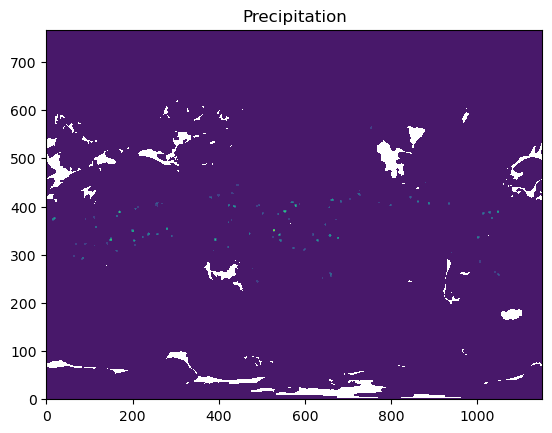

In [7]:
plt.contourf(data_pr.variables['pr'][0][0])
plt.title('Precipitation')
plt.show()

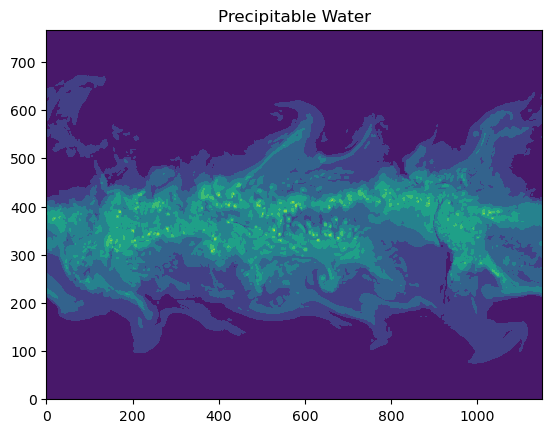

In [8]:
plt.contourf(data_prw.variables['prw'][0])
plt.title('Precipitable Water')
plt.show()

In [9]:
# Concatenate the data into 1 file, with the same time axis

In [10]:
ds = xarray.open_mfdataset('../data/working/*.nc', combine='by_coords', concat_dim='time')

/home/felix/.conda/envs/climatenet/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/felix/.conda/envs/climatenet/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [11]:
ds

<xarray.Dataset>
Dimensions:    (height: 1, lat: 768, lon: 1152, nb2: 2, nbnd: 2, plev: 1, time: 3888)
Coordinates:
  * time       (time) object 2084-01-01 00:00:00 ... 2084-08-31 22:30:00
  * height     (height) float32 0.0
  * lat        (lat) float32 -90.0 -89.77 -89.53 -89.3 ... 89.3 89.53 89.77 90.0
  * lon        (lon) float32 0.0 0.3125 0.625 0.9375 ... 358.8 359.1 359.4 359.7
  * plev       (plev) float32 8.5e+04
Dimensions without coordinates: nb2, nbnd
Data variables:
    time_bnds  (time, nb2, nbnd) object dask.array<chunksize=(3888, 2, 2), meta=np.ndarray>
    pr         (time, height, lat, lon) float32 dask.array<chunksize=(3888, 1, 768, 1152), meta=np.ndarray>
    prw        (time, lat, lon) float32 dask.array<chunksize=(3888, 768, 1152), meta=np.ndarray>
    ua850      (time, plev, lat, lon) float32 dask.array<chunksize=(3888, 1, 768, 1152), meta=np.ndarray>
    va850      (time, plev, lat, lon) float32 dask.array<chunksize=(3888, 1, 768, 1152), meta=np.ndarray>
Attributes:
    history:                   2019-04-17T10:21:27Z: Naming and attribute con...
    forcing:                   SST=cam5.1_0.25degree_MRI_sst_created_rcp85_20...
    institute_run_id:          mri_rcp8.5_hires2
    CDO:                       Climate Data Operators version 1.6.5.2 (http:/...
    institution:               Lawrence Berkeley National Laboratory, Berkele...
    institute_id:              LBNL
    experiment_family:         PlusRCP85
    experiment:                MRI-est1
    subexperiment:             v1-0
    run_id:                    run002
    model_id:                  CAM5.1-0.25degree
    frequency:                 3hr
    contact:                   mfwehner@lbl.gov
    title:                     CAM5.1 model at 0.3125x0.2344degree resolution
    parent_experiment_family:  N/A
    parent_experiment:         N/A
    parent_subexperiment:      N/A
    parent_run_id:             N/A
    project_id:                C20C+ Detection and Attribution Project
    license:                   Creative Commons License: http://creativecommo...
    creation_date:             2019-04-17T10:21:27Z
    NCO:                       netCDF Operators version 4.7.4 (http://nco.sf....
    acknowledgement:           This simulation was performed under the CASCAD...

In [ ]:
ds.to_netcdf('../data/working/combined.nc')

In [ ]:
combined_data = netCDF4.Dataset('../data/working/combined.nc')